**Multivariate Time Series Forecasting on temperature data**

In [ ]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [ ]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

13568290/13568290 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
data = pd.read_csv(csv_path)
data

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [ ]:
# Want to gt every hour
data = data[5::6]
data

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
420539,31.12.2016 22:10:00,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


In [ ]:
# Set date to datetime
data['Date Time'] = pd.to_datetime(data['Date Time'], format='%d.%m.%Y %H:%M:%S')
data.set_index(data['Date Time'], inplace=True)
data

<ipython-input-14-d1c422f0efd2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date Time'] = pd.to_datetime(data['Date Time'], format='%d.%m.%Y %H:%M:%S')


,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,2009-01-01 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,2009-01-01 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,2009-01-01 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,2009-01-01 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,2009-01-01 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:10:00,2016-12-31 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
2016-12-31 20:10:00,2016-12-31 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
2016-12-31 21:10:00,2016-12-31 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7


In [ ]:
temp_data = data['T (degC)']
temp_data

,T (degC)
Date Time,
2009-01-01 01:00:00,-8.05
2009-01-01 02:00:00,-8.88
2009-01-01 03:00:00,-8.81
2009-01-01 04:00:00,-9.05
2009-01-01 05:00:00,-9.63
...,...
2016-12-31 19:10:00,-0.98
2016-12-31 20:10:00,-1.40
2016-12-31 21:10:00,-2.75


array([<Axes: xlabel='Date Time'>], dtype=object)

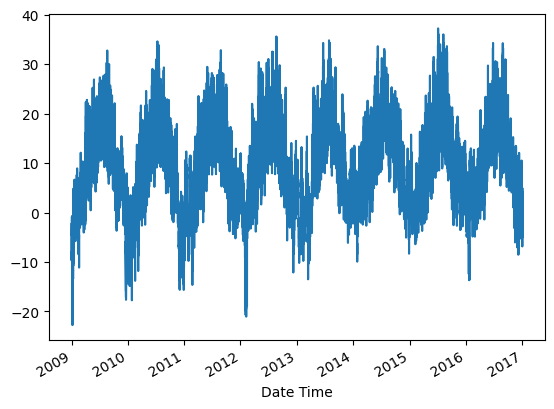

In [ ]:
temp_data.plot(subplots=True)

In [ ]:
temp_data.isna().sum()

0

In [ ]:
# Want to divide the time series into a machine learning type of objective
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)


In [ ]:
# Univariate Case
X, y = df_to_X_y(temp_data, window_size=5)
X.shape, y.shape

((70086, 5, 1), (70086,))

In [ ]:
# Split the data into train, val, and test set
X_train , y_train = X[:60000], y[:60000]
X_val, y_val = X[60000:65000], y[60000:65000]
X_test, y_test = X[65000:], y[65000:]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((60000, 5, 1), (60000,), (5000, 5, 1), (5000,), (5086, 5, 1), (5086,))

In [ ]:
# Define the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, InputLayer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError


model = Sequential()
model.add(InputLayer(input_shape=(5, 1)))
model.add(LSTM(64))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss=MeanSquaredError(),
              optimizer=Adam(learning_rate=0.0001),
              metrics=[RootMeanSquaredError()])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,009 (74.25 KB)

 Trainable params: 19,009 (74.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Time to train the model
checkpoint = ModelCheckpoint('model1/model_checkpoint.keras', save_best_only=True)
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=40,
                    batch_size=256,
                    callbacks=[checkpoint])

Epoch 1/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 148.5954 - root_mean_squared_error: 12.1785 - val_loss: 28.8050 - val_root_mean_squared_error: 5.3670
Epoch 2/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 61.0905 - root_mean_squared_error: 7.7977 - val_loss: 8.1265 - val_root_mean_squared_error: 2.8507
Epoch 3/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 20.7066 - root_mean_squared_error: 4.5394 - val_loss: 2.6621 - val_root_mean_squared_error: 1.6316
Epoch 4/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 8.1548 - root_mean_squared_error: 2.8527 - val_loss: 1.5626 - val_root_mean_squared_error: 1.2501
Epoch 5/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 4.5929 - root_mean_squared_error: 2.1419 - val_loss: 1.1615 - val_root_mean_squared_error: 1.0777
Epoch 6/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 2.9472 - root_mean_squared_error: 1.7162 - val_loss: 0.9401 - val_root_mean_squared_error: 0.9696
Epoch 7/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('model1/model_checkpoint.keras')

In [ ]:
train_pred = model.predict(X_train).flatten()
train_res = pd.DataFrame({'Actual': y_train, 'Predicted': train_pred})
train_res

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


,Actual,Predicted
0,-9.67,-9.894268
1,-9.17,-9.681375
2,-8.10,-8.793333
3,-7.66,-7.328180
4,-7.04,-7.242801
...,...,...
59995,6.07,6.057623
59996,9.88,7.279638
59997,13.53,12.276249
59998,15.43,16.094162


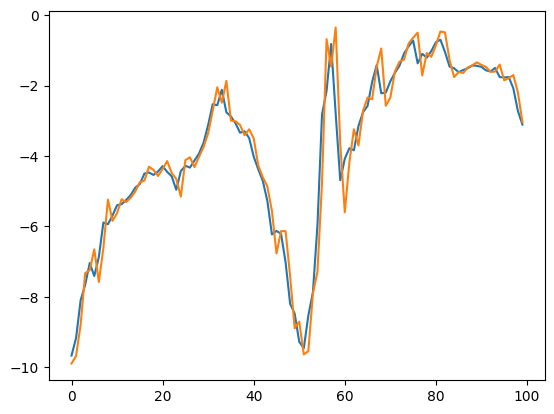

In [ ]:
# Plot the results
from matplotlib import pyplot as plt
plt.plot(train_res['Actual'][:100])
plt.plot(train_res['Predicted'][:100])

In [ ]:
# Multivarite Case starts here!
# Start by incorporating seasonality by using sequence-based functions

# Step 1: get amount of secons from datetime
temp_df = pd.DataFrame(data={'Temp': temp_data})
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)
temp_df

,Temp,Seconds
Date Time,,
2009-01-01 01:00:00,-8.05,1.230772e+09
2009-01-01 02:00:00,-8.88,1.230775e+09
2009-01-01 03:00:00,-8.81,1.230779e+09
2009-01-01 04:00:00,-9.05,1.230782e+09
2009-01-01 05:00:00,-9.63,1.230786e+09
...,...,...
2016-12-31 19:10:00,-0.98,1.483211e+09
2016-12-31 20:10:00,-1.40,1.483215e+09
2016-12-31 21:10:00,-2.75,1.483219e+09


In [ ]:
day_to_seconds = 24*60*60
year_to_seconds = 365*day_to_seconds

temp_df['Day sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi / day_to_seconds))
temp_df['Day cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / day_to_seconds))
temp_df['Year sin'] = np.sin(temp_df['Seconds'] * (2*np.pi / year_to_seconds))
temp_df['Year cos'] = np.cos(temp_df['Seconds'] * (2*np.pi / year_to_seconds))

temp_df

,Temp,Seconds,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,-8.05,1.230772e+09,0.258819,0.965926,0.172000,0.985097
2009-01-01 02:00:00,-8.88,1.230775e+09,0.500000,0.866025,0.172706,0.984973
2009-01-01 03:00:00,-8.81,1.230779e+09,0.707107,0.707107,0.173413,0.984849
2009-01-01 04:00:00,-9.05,1.230782e+09,0.866025,0.500000,0.174119,0.984725
2009-01-01 05:00:00,-9.63,1.230786e+09,0.965926,0.258819,0.174825,0.984599
...,...,...,...,...,...,...
2016-12-31 19:10:00,-0.98,1.483211e+09,-0.953717,0.300706,0.201710,0.979445
2016-12-31 20:10:00,-1.40,1.483215e+09,-0.843391,0.537300,0.202413,0.979300
2016-12-31 21:10:00,-2.75,1.483219e+09,-0.675590,0.737277,0.203115,0.979155


In [ ]:
# Lets drop the seconds column now
temp_df.drop('Seconds', inplace=True, axis=1)
temp_df

,Temp,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,
2009-01-01 01:00:00,-8.05,0.258819,0.965926,0.172000,0.985097
2009-01-01 02:00:00,-8.88,0.500000,0.866025,0.172706,0.984973
2009-01-01 03:00:00,-8.81,0.707107,0.707107,0.173413,0.984849
2009-01-01 04:00:00,-9.05,0.866025,0.500000,0.174119,0.984725
2009-01-01 05:00:00,-9.63,0.965926,0.258819,0.174825,0.984599
...,...,...,...,...,...
2016-12-31 19:10:00,-0.98,-0.953717,0.300706,0.201710,0.979445
2016-12-31 20:10:00,-1.40,-0.843391,0.537300,0.202413,0.979300
2016-12-31 21:10:00,-2.75,-0.675590,0.737277,0.203115,0.979155


In [ ]:
# Now its time to get the matrices for training
def df_to_X_y_2(df, window_size=6):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [a for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
X, y = df_to_X_y_2(temp_df)
X.shape, y.shape

((70085, 6, 5), (70085,))

In [ ]:
X2_train, y2_train = X[:60000], y[:60000]
X2_val, y2_val = X[60000:65000], y[60000:65000]
X2_test, y2_test = X[65000:], y[65000:]

X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((60000, 6, 5), (60000,), (5000, 6, 5), (5000,), (5085, 6, 5), (5085,))

In [ ]:
# Need to preprocess X for scaling purposes
def preprocess_X(X):
  X[:, :, 0] = (X[:, :, 0] - X[:, :, 0].mean()) / X[:, :, 0].std()
  return X

In [ ]:
X2_train = preprocess_X(X2_train)
X2_val = preprocess_X(X2_val)
X2_test = preprocess_X(X2_test)

In [ ]:
# Time to build our model
from keras.regularizers import l2

model3 = Sequential()
model3.add(InputLayer(input_shape=(6, 5)))
model3.add(LSTM(64, kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model3.add(Dense(8, activation='relu'))
model3.add(Dense(1, activation='linear'))

model3.compile(loss=MeanSquaredError(),
              optimizer=Adam(learning_rate=0.0001),
              metrics=[RootMeanSquaredError()])

model3.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                        │ (None, 64)                  │          17,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,449 (72.07 KB)

 Trainable params: 18,449 (72.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cp3 = ModelCheckpoint('model3/model_checkpoint.keras', save_best_only=True)

model3.fit(X2_train, y2_train,
           validation_data=(X2_val, y2_val),
           epochs=20,
           callbacks=[cp3])

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 80.7414 - root_mean_squared_error: 8.6330 - val_loss: 13.3039 - val_root_mean_squared_error: 3.4337
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 7.2836 - root_mean_squared_error: 2.4040 - val_loss: 11.9016 - val_root_mean_squared_error: 3.2435
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 3.7542 - root_mean_squared_error: 1.5435 - val_loss: 12.1606 - val_root_mean_squared_error: 3.2993
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 2.3631 - root_mean_squared_error: 1.0650 - val_loss: 13.1129 - val_root_mean_squared_error: 3.4701
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 1.8724 - root_mean_squared_error: 0.9219 - val_loss: 14.5091 - val_root_mean_squared_error: 3.6906
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 1.5574 - root_mean_squared_error: 0.8402 - val_loss: 13.9936 - val_root_mean_squared_error: 3.6395
Epoch 7/20
1875/1875 ━━━━━━━━━

In [ ]:
test_pred = model3.predict(X2_test).flatten()
test_res = pd.DataFrame({'Actual': y2_test, 'Predicted': test_pred})
test_res

159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


,Actual,Predicted
0,13.46,10.051494
1,12.93,9.619811
2,12.43,9.245276
3,12.17,8.972809
4,11.55,9.100548
...,...,...
5080,-0.98,-4.343574
5081,-1.40,-4.814942
5082,-2.75,-5.068930
5083,-2.89,-6.319351


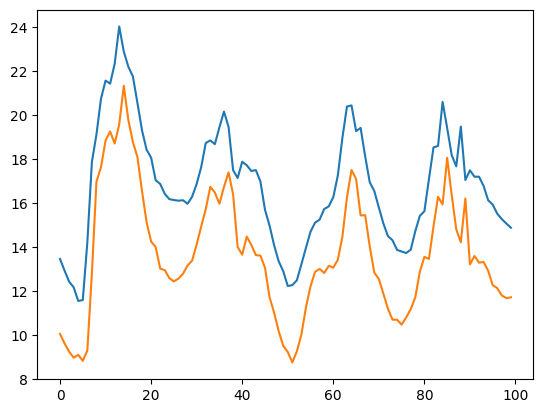

In [ ]:
plt.plot(test_res['Actual'][:100])
plt.plot(test_res['Predicted'][:100])